In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql 

In [15]:
# Database connection parameters
db_params = {
    'host': 'localhost',
    'user': 'root',
    'password': '',
    'database': 'toko_karunia',
    'port': 3306  # Default MySQL port
}

In [17]:


# Establish the database connection
connection = pymysql.connect(**db_params)

try:
    # Execute the query
    query = "SELECT * FROM product"
    df = pd.read_sql(query, connection)
finally:
    # Close the connection
    connection.close()

# Display the DataFrame
df


/tmp/ipykernel_90539/2171084170.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,id,nama,stok_awal,stok_terjual,harga
0,6,Mc toshiba 75mn,61,23,5000000
1,7,Mc aqua 88dd,24,9,3000000
2,8,Mc poltron 1076,81,51,4500000
3,9,Mc sharp 70mw,60,44,3500000
4,10,Mc sharp 80mw,64,25,3200000
5,11,Mc sharp 1070,92,44,3100000
6,12,Mc panasonic 96bb,96,26,4000000
7,13,Speaker polytron 8Ff22,84,52,2000000
8,14,Speaker poltron 8ff28,84,55,2500000
9,15,Speaker polytron 8cf28,97,52,2300000


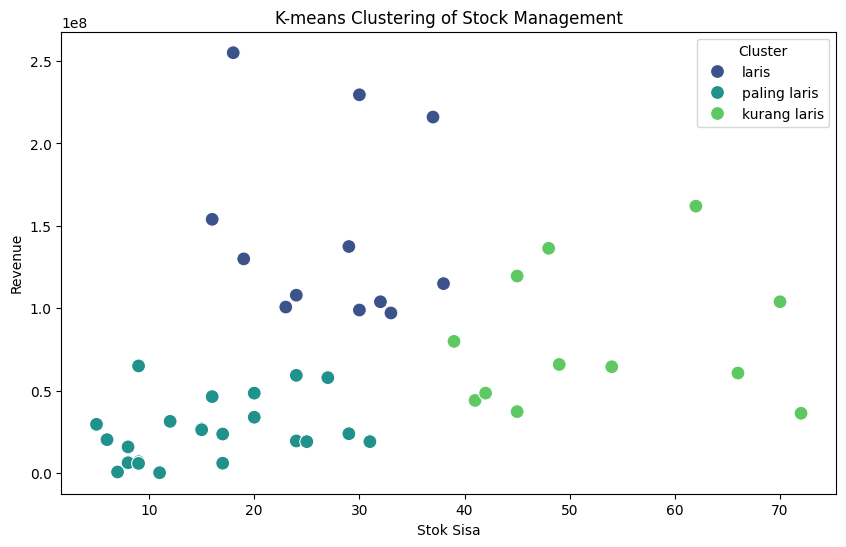

In [20]:
# Calculate additional fields
df['stok_sisa'] = df['stok_awal'] - df['stok_terjual']
df['revenue'] = df['stok_terjual'] * df['harga']

# Select features for clustering
features = df[['stok_sisa', 'revenue']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
df['cluster'] = kmeans.labels_

# Map cluster labels to custom names
label_mapping = {0: 'paling laris', 1: 'laris', 2: 'kurang laris'}
df['cluster_label'] = df['cluster'].map(label_mapping)

# Plot the clusters using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stok_sisa', y='revenue', hue='cluster_label', palette='viridis', s=100)
plt.title('K-means Clustering of Stock Management')
plt.xlabel('Stok Sisa')
plt.ylabel('Revenue')
plt.legend(title='Cluster')
plt.show()

/tmp/ipykernel_90539/1452212857.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='stok_terjual', y='nama', palette='viridis')


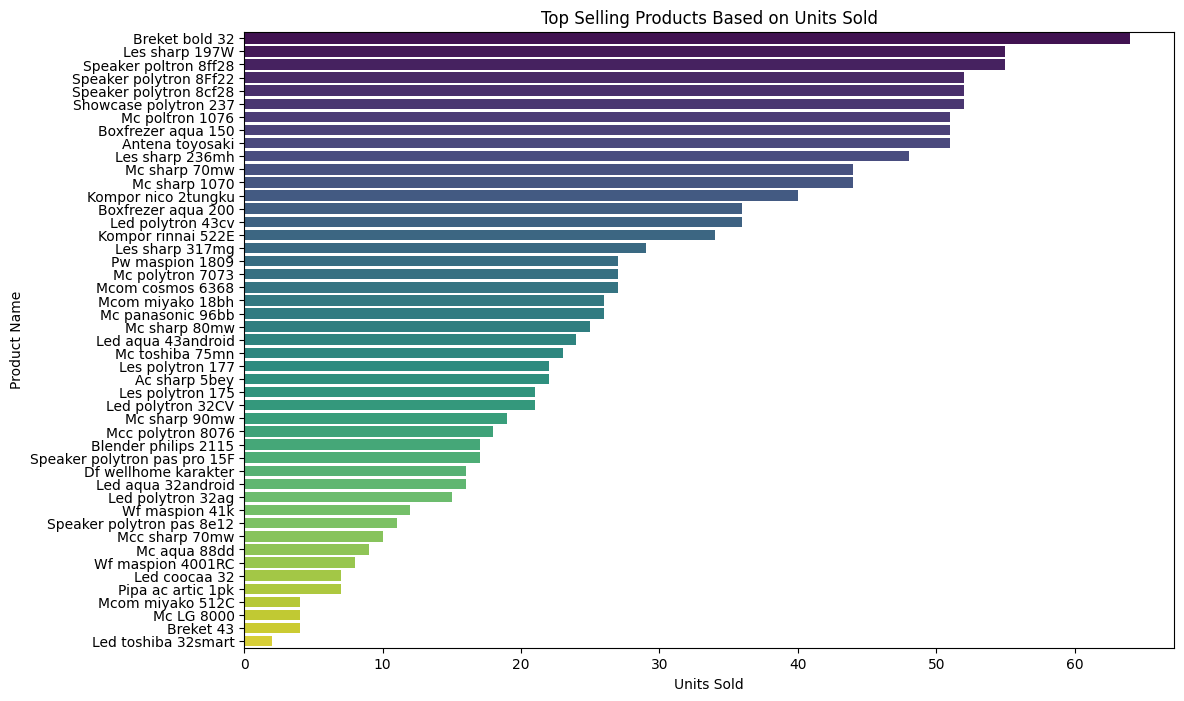

In [21]:
# Sort data by 'stok_terjual'
df_sorted = df.sort_values(by='stok_terjual', ascending=False)

# Plot the top-selling products using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df_sorted, x='stok_terjual', y='nama', palette='viridis')
plt.title('Top Selling Products Based on Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Product Name')
plt.show()
